## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import missingno as msno
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

Link a mi GitHub con el Taller:  https://github.com/louisboza/DS_UC_Diplomado/blob/main/Taller_2/16841206-1.ipynb

## Pregunta 1

Realice un análisis de componentes principales seleccione la cantidad de componentes que expliquen al menos el 70% de la variabilidad de los datos.

In [2]:
url1 = 'https://raw.githubusercontent.com/louisboza/DS_UC_Diplomado/main/Taller_3/src/datos%20clustering.csv'
df = pd.read_csv(url1)
df = df.iloc[: , 1:]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      1000 non-null   float64
 1   V2      1000 non-null   float64
 2   V3      1000 non-null   float64
 3   V4      1000 non-null   float64
 4   V5      1000 non-null   float64
 5   V6      1000 non-null   float64
 6   V7      1000 non-null   float64
 7   V8      1000 non-null   float64
 8   V9      1000 non-null   float64
 9   V10     1000 non-null   float64
 10  y       1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


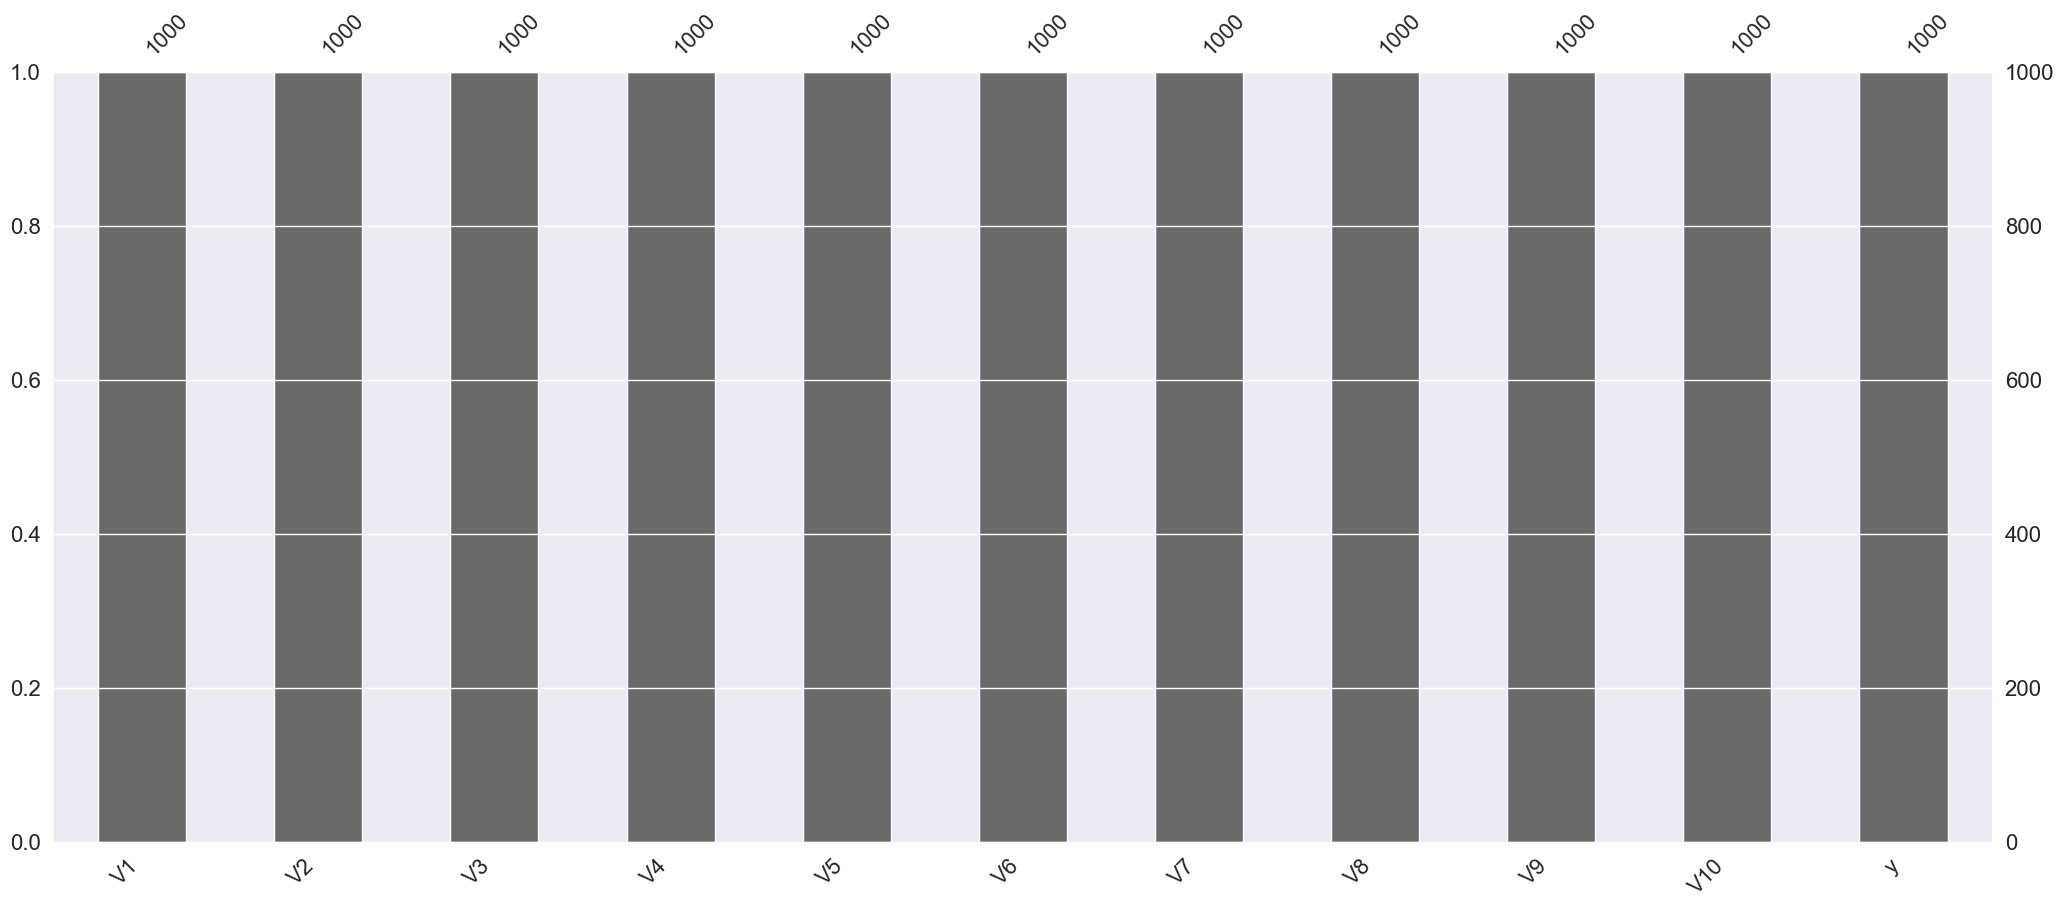

In [4]:
msno.bar(df)
plt.show();

La base se ve limpia, sin valores nulos.

In [5]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,y
0,-4.554889,4.100700,-3.134432,-1.313845,-9.391112,2.519540,1.308041,0.926173,7.067234,3.509057,3
1,10.766431,4.114985,-0.145851,6.064239,-4.482858,2.045298,-8.068677,7.231181,-1.361735,-1.031854,2
2,8.697494,6.927252,0.081115,8.782801,-6.016109,2.765242,-9.023664,9.352678,-1.699800,-0.519918,2
3,7.887380,0.888983,0.613888,6.976301,-11.153522,-5.858364,-12.793676,4.969787,1.399372,6.831188,1
4,3.432427,3.062779,0.881139,-0.040477,-4.844429,2.057529,-2.111636,8.952105,10.530478,-2.324382,0
...,...,...,...,...,...,...,...,...,...,...,...
995,-5.638204,5.114135,-2.291695,0.251086,-10.924352,1.057903,-1.287649,0.283605,10.307540,3.024076,3
996,-3.508695,0.723544,7.349984,-9.965556,5.947235,3.773877,-5.598804,-6.681666,-3.295204,-4.446303,4
997,7.674610,1.017102,0.417147,9.468713,-8.446090,3.635614,-7.830873,7.801254,3.202772,-1.398679,2
998,-2.715874,-4.812502,1.952096,-9.379788,2.704248,2.744819,-9.215514,-3.714886,-3.388018,-2.648786,4


In [6]:
X = df.drop(['y'], axis=1).values
y = df['y']

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(
            StandardScaler(),
            PCA(random_state = 2023)
)

pipeline.fit(X)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(random_state=2023))])

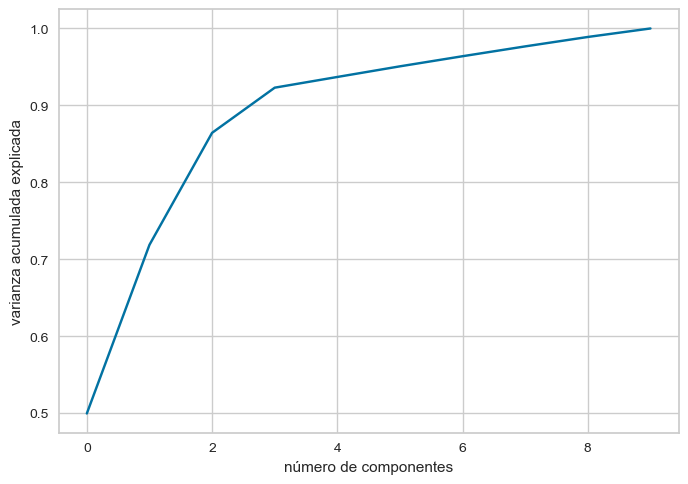

In [14]:
plt.plot(np.cumsum(pipeline['pca'].fit(X).explained_variance_ratio_))
plt.xlabel('número de componentes')
plt.ylabel('varianza acumulada explicada');

Observando el gráfico de varianza acumulada vemos que con 2 variables ya tenemos explicado más del 70% de la varianza del dataframe.

## Pregunta 2

Detecte el número óptimo de clustering utilizando la información de PCA con la metodología de Elbow y Average silhouette.

In [9]:
X_trans = pipeline.transform(X)
#ss = StandardScaler()

#X_trans = ss.fit_transform(X_trans)

### Elbow Method

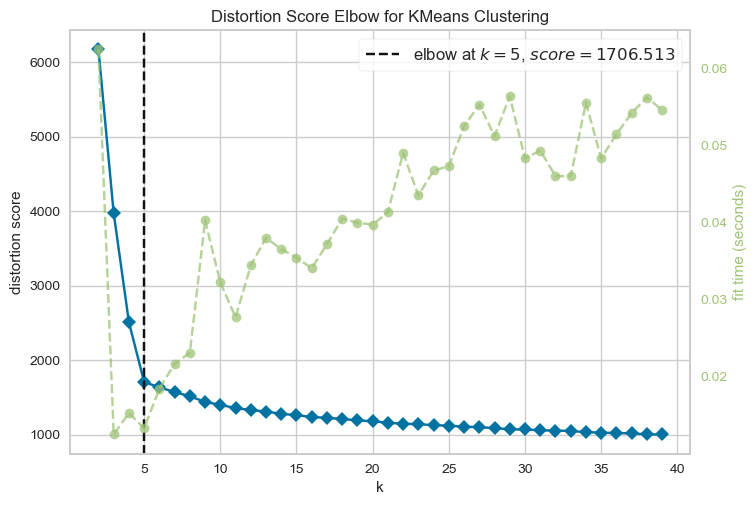

In [10]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state = 2023)

vs = KElbowVisualizer(model, k = (2, 40), metric = 'distortion')

vs.fit(X_trans)
vs.show();

### Silhouette Method

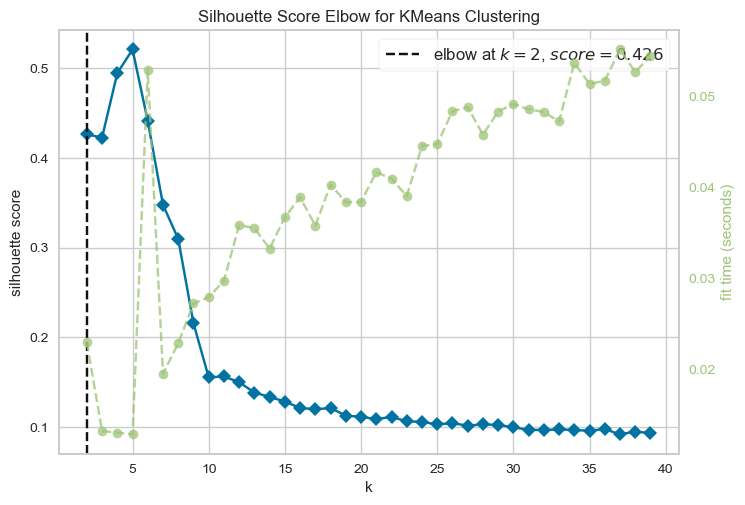

In [11]:
vs = KElbowVisualizer(model, k = (2, 40), metric = 'silhouette')

vs.fit(X_trans)
vs.show();

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

visualizer = SilhouetteVisualizer(model, k = (2, 20), colors = 'yellowbrick')

visualizer.fit(X_trans)
visualizer.show();

## Pregunta 3

Ajuste un clustering de K-means, utilizando las 2 principales componentes principales gráfique los grupos ajustados, qué puede concluir al respecto?

In [ ]:
dg = pd.DataFrame(X_trans)
dg = dg.iloc[: , :2]
dg

In [ ]:
modelo = KMeans(random_state = 2023, n_clusters = 5)
modelo.fit(dg)

In [ ]:
dg['labels'] = modelo.labels_

In [ ]:
dg.rename(columns = {0: "PCA_1", 1: "PCA_2"}, inplace = True)
dg

In [ ]:
sns.scatterplot(data = dg, x = "PCA_1", y = "PCA_2", hue = "labels")

In [ ]:
df.describe()

In [ ]:
dm = pd.DataFrame(X_trans)
dm.describe()